In [416]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [417]:
scb_prel_url = 'https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/'\
'befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/'

scb_prel_file = pd.ExcelFile(scb_prel_url)
scb_prel_file.sheet_names

['Info',
 'Tabell 1',
 'Tabell 2',
 'Tabell 3',
 'Tabell 4',
 'Tabell 5',
 'Tabell 6',
 'Tabell 7',
 'Tabell 8',
 'Tabell 9a',
 'Tabell 9b',
 'Tabell 10',
 'Tabell 11',
 'Tabell 12']

In [418]:
scb_prel_age = scb_prel_file.parse('Tabell 2',skiprows=7,usecols=[0,1,4,5,6,7,9,10,11,12])

scb_prel_age['DagMånad'] = scb_prel_age['DagMånad'].str.strip(' ')

unknowns = scb_prel_age.loc[scb_prel_age['DagMånad'] == 'Okänd dödsdag']

scb_prel_age = scb_prel_age.loc[scb_prel_age['DagMånad'] != 'Okänd dödsdag']
scb_prel_age = scb_prel_age[::-1]
scb_prel_age

,År,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2280,2015,1 januari,25,35,48,33,12,41,53,48
2279,2015,2 januari,16,49,63,25,7,26,48,38
2278,2015,3 januari,24,48,49,25,16,32,37,50
2277,2015,4 januari,16,31,40,22,6,26,61,54
2276,2015,5 januari,8,44,34,28,16,34,56,48
...,...,...,...,...,...,...,...,...,...,...
4,2021,26 mars,9,13,13,4,3,2,14,18
3,2021,27 mars,1,7,4,4,1,6,6,12
2,2021,28 mars,5,6,12,6,1,4,6,15
1,2021,29 mars,1,2,6,3,3,7,10,6


In [419]:
scb_prel_age[['day','month']] = scb_prel_age['DagMånad'].str.split(expand=True)
scb_prel_age

,År,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år,day,month
2280,2015,1 januari,25,35,48,33,12,41,53,48,1,januari
2279,2015,2 januari,16,49,63,25,7,26,48,38,2,januari
2278,2015,3 januari,24,48,49,25,16,32,37,50,3,januari
2277,2015,4 januari,16,31,40,22,6,26,61,54,4,januari
2276,2015,5 januari,8,44,34,28,16,34,56,48,5,januari
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,26 mars,9,13,13,4,3,2,14,18,26,mars
3,2021,27 mars,1,7,4,4,1,6,6,12,27,mars
2,2021,28 mars,5,6,12,6,1,4,6,15,28,mars
1,2021,29 mars,1,2,6,3,3,7,10,6,29,mars


In [420]:
swe_to_eng = {'januari':1,'februari' : 2,'mars' : 3,'april' : 4,
              'maj' : 5,'juni' : 6,'juli' : 7,'augusti' : 8,
              'september' : 9,'oktober' : 10,'november' : 11,'december' : 12}

scb_prel_age.rename(columns={'År' : 'year'},inplace=True)

scb_prel_age['day'] = scb_prel_age['day'].astype(int)
scb_prel_age['month'] = scb_prel_age['month'].apply(lambda x : int(swe_to_eng[x]))
scb_prel_age

,year,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år,day,month
2280,2015,1 januari,25,35,48,33,12,41,53,48,1,1
2279,2015,2 januari,16,49,63,25,7,26,48,38,2,1
2278,2015,3 januari,24,48,49,25,16,32,37,50,3,1
2277,2015,4 januari,16,31,40,22,6,26,61,54,4,1
2276,2015,5 januari,8,44,34,28,16,34,56,48,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021,26 mars,9,13,13,4,3,2,14,18,26,3
3,2021,27 mars,1,7,4,4,1,6,6,12,27,3
2,2021,28 mars,5,6,12,6,1,4,6,15,28,3
1,2021,29 mars,1,2,6,3,3,7,10,6,29,3


In [421]:
scb_prel_age.index = pd.to_datetime(scb_prel_age[['year','month','day']])
scb_prel_age

,year,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år,day,month
2015-01-01,2015,1 januari,25,35,48,33,12,41,53,48,1,1
2015-01-02,2015,2 januari,16,49,63,25,7,26,48,38,2,1
2015-01-03,2015,3 januari,24,48,49,25,16,32,37,50,3,1
2015-01-04,2015,4 januari,16,31,40,22,6,26,61,54,4,1
2015-01-05,2015,5 januari,8,44,34,28,16,34,56,48,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,2021,26 mars,9,13,13,4,3,2,14,18,26,3
2021-03-27,2021,27 mars,1,7,4,4,1,6,6,12,27,3
2021-03-28,2021,28 mars,5,6,12,6,1,4,6,15,28,3
2021-03-29,2021,29 mars,1,2,6,3,3,7,10,6,29,3


In [422]:
scb_prel_age.drop(['year','DagMånad','day','month'],axis=1,inplace=True)

In [423]:
scb_prel_age

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015-01-01,25,35,48,33,12,41,53,48
2015-01-02,16,49,63,25,7,26,48,38
2015-01-03,24,48,49,25,16,32,37,50
2015-01-04,16,31,40,22,6,26,61,54
2015-01-05,8,44,34,28,16,34,56,48
...,...,...,...,...,...,...,...,...
2021-03-26,9,13,13,4,3,2,14,18
2021-03-27,1,7,4,4,1,6,6,12
2021-03-28,5,6,12,6,1,4,6,15
2021-03-29,1,2,6,3,3,7,10,6


In [424]:
unknowns = unknowns.set_index('År')
unknowns

,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
År,,,,,,,,,
2021,Okänd dödsdag,193,208,49,11,57,71,44,16
2020,Okänd dödsdag,745,828,232,50,217,339,179,73
2019,Okänd dödsdag,732,771,242,41,259,338,175,58
2018,Okänd dödsdag,698,752,249,46,217,315,175,61
2017,Okänd dödsdag,645,620,198,49,213,276,168,61
2016,Okänd dödsdag,582,572,162,34,169,244,153,47
2015,Okänd dödsdag,307,280,81,22,81,112,56,21


In [425]:
unknowns.drop('DagMånad',axis=1,inplace=True)


In [426]:
unknowns

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
År,,,,,,,,
2021,193,208,49,11,57,71,44,16
2020,745,828,232,50,217,339,179,73
2019,732,771,242,41,259,338,175,58
2018,698,752,249,46,217,315,175,61
2017,645,620,198,49,213,276,168,61
2016,582,572,162,34,169,244,153,47
2015,307,280,81,22,81,112,56,21


In [427]:
### pattern transform ###
day_proportion = scb_prel_age.groupby(scb_prel_age.index.year).transform(lambda x : x / x.sum())
day_proportion

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015-01-01,0.003853,0.002383,0.003143,0.004491,0.002930,0.003857,0.003183,0.003249
2015-01-02,0.002466,0.003337,0.004125,0.003402,0.001709,0.002446,0.002883,0.002572
2015-01-03,0.003699,0.003268,0.003208,0.003402,0.003906,0.003010,0.002222,0.003384
2015-01-04,0.002466,0.002111,0.002619,0.002994,0.001465,0.002446,0.003664,0.003655
2015-01-05,0.001233,0.002996,0.002226,0.003811,0.003906,0.003198,0.003363,0.003249
...,...,...,...,...,...,...,...,...
2021-03-26,0.006808,0.003222,0.003090,0.001939,0.003584,0.000718,0.003439,0.004699
2021-03-27,0.000756,0.001735,0.000951,0.001939,0.001195,0.002154,0.001474,0.003132
2021-03-28,0.003782,0.001487,0.002852,0.002908,0.001195,0.001436,0.001474,0.003915
2021-03-29,0.000756,0.000496,0.001426,0.001454,0.003584,0.002513,0.002456,0.001566


In [428]:
### pattern different size df's ### 
# in order to multiply day_proportions with unknowns, year-by-year, we must temporarily set a common index.
# the index will contain duplicates of years, that's no problem # 

idx = day_proportion.index
day_proportion = day_proportion.set_index(day_proportion.index.year)
day_proportion

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015,0.003853,0.002383,0.003143,0.004491,0.002930,0.003857,0.003183,0.003249
2015,0.002466,0.003337,0.004125,0.003402,0.001709,0.002446,0.002883,0.002572
2015,0.003699,0.003268,0.003208,0.003402,0.003906,0.003010,0.002222,0.003384
2015,0.002466,0.002111,0.002619,0.002994,0.001465,0.002446,0.003664,0.003655
2015,0.001233,0.002996,0.002226,0.003811,0.003906,0.003198,0.003363,0.003249
...,...,...,...,...,...,...,...,...
2021,0.006808,0.003222,0.003090,0.001939,0.003584,0.000718,0.003439,0.004699
2021,0.000756,0.001735,0.000951,0.001939,0.001195,0.002154,0.001474,0.003132
2021,0.003782,0.001487,0.002852,0.002908,0.001195,0.001436,0.001474,0.003915
2021,0.000756,0.000496,0.001426,0.001454,0.003584,0.002513,0.002456,0.001566


In [429]:
add_ons = day_proportion * unknowns
add_ons.index = idx

add_ons

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015-01-01,1.182953,0.667302,0.254567,0.098802,0.237305,0.431985,0.178258,0.068219
2015-01-02,0.757090,0.934223,0.334119,0.074850,0.138428,0.273942,0.161441,0.054006
2015-01-03,1.135635,0.915157,0.259870,0.074850,0.316406,0.337159,0.124444,0.071061
2015-01-04,0.757090,0.591039,0.212139,0.065868,0.118652,0.273942,0.205165,0.076746
2015-01-05,0.378545,0.838894,0.180318,0.083832,0.316406,0.358231,0.188348,0.068219
...,...,...,...,...,...,...,...,...
2021-03-26,1.313918,0.670136,0.151414,0.021328,0.204301,0.050969,0.151314,0.075176
2021-03-27,0.145991,0.360843,0.046589,0.021328,0.068100,0.152907,0.064849,0.050117
2021-03-28,0.729955,0.309294,0.139767,0.031992,0.068100,0.101938,0.064849,0.062647
2021-03-29,0.145991,0.103098,0.069884,0.015996,0.204301,0.178392,0.108082,0.025059


In [430]:
scb_prel_age += add_ons
scb_prel_age

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015-01-01,26.182953,35.667302,48.254567,33.098802,12.237305,41.431985,53.178258,48.068219
2015-01-02,16.757090,49.934223,63.334119,25.074850,7.138428,26.273942,48.161441,38.054006
2015-01-03,25.135635,48.915157,49.259870,25.074850,16.316406,32.337159,37.124444,50.071061
2015-01-04,16.757090,31.591039,40.212139,22.065868,6.118652,26.273942,61.205165,54.076746
2015-01-05,8.378545,44.838894,34.180318,28.083832,16.316406,34.358231,56.188348,48.068219
...,...,...,...,...,...,...,...,...
2021-03-26,10.313918,13.670136,13.151414,4.021328,3.204301,2.050969,14.151314,18.075176
2021-03-27,1.145991,7.360843,4.046589,4.021328,1.068100,6.152907,6.064849,12.050117
2021-03-28,5.729955,6.309294,12.139767,6.031992,1.068100,4.101938,6.064849,15.062647
2021-03-29,1.145991,2.103098,6.069884,3.015996,3.204301,7.178392,10.108082,6.025059


In [431]:
yearly_ages = scb_prel_age.groupby(scb_prel_age.index.year).sum()
yearly_ages

,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år
2015,6795.0,14966.0,15354.0,7370.0,4177.0,10742.0,16706.0,14797.0
2016,6686.0,15217.0,14988.0,7530.0,4184.0,10965.0,16443.0,14969.0
2017,6608.0,15074.0,15364.0,7810.0,4128.0,11266.0,16624.0,15098.0
2018,6541.0,15639.0,15598.0,7638.0,4061.0,11477.0,16202.0,15029.0
2019,6161.0,15312.0,15040.0,7513.0,3978.0,10967.0,15554.0,14241.0
2020,6562.0,16852.0,17389.0,8578.0,3893.0,11943.0,17185.0,15722.0
2021,1515.0,4243.0,4256.0,2074.0,894.0,2857.0,4115.0,3847.0


In [432]:
male_cols = yearly_ages.columns[yearly_ages.columns.str.contains('M')]
female_cols = yearly_ages.columns[yearly_ages.columns.str.contains('K')]

male_deaths = yearly_ages[male_cols]
male_deaths.columns = ['-64','65-79','80-89','90+']

female_deaths = yearly_ages[female_cols]
female_deaths.columns = ['-64','65-79','80-89','90+']

print (female_deaths)
print()
print (male_deaths)

         -64    65-79    80-89      90+
2015  4177.0  10742.0  16706.0  14797.0
2016  4184.0  10965.0  16443.0  14969.0
2017  4128.0  11266.0  16624.0  15098.0
2018  4061.0  11477.0  16202.0  15029.0
2019  3978.0  10967.0  15554.0  14241.0
2020  3893.0  11943.0  17185.0  15722.0
2021   894.0   2857.0   4115.0   3847.0

         -64    65-79    80-89     90+
2015  6795.0  14966.0  15354.0  7370.0
2016  6686.0  15217.0  14988.0  7530.0
2017  6608.0  15074.0  15364.0  7810.0
2018  6541.0  15639.0  15598.0  7638.0
2019  6161.0  15312.0  15040.0  7513.0
2020  6562.0  16852.0  17389.0  8578.0
2021  1515.0   4243.0   4256.0  2074.0


In [433]:
### sanity check ###
print (yearly_ages.sum(axis=1))
print ()
print (male_deaths.sum(axis=1) + female_deaths.sum(axis=1))
print ()
print (male_deaths.sum(axis=1))
print ()
print (female_deaths.sum(axis=1))

2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    98124.0
2021    23801.0
dtype: float64

2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    98124.0
2021    23801.0
dtype: float64

2015    44485.0
2016    44421.0
2017    44856.0
2018    45416.0
2019    44026.0
2020    49381.0
2021    12088.0
dtype: float64

2015    46422.0
2016    46561.0
2017    47116.0
2018    46769.0
2019    44740.0
2020    48743.0
2021    11713.0
dtype: float64


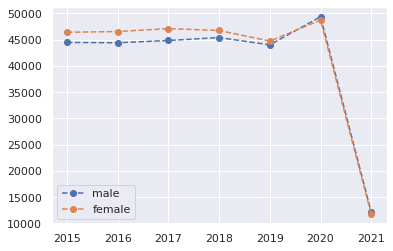

In [434]:
ax = male_deaths.sum(axis=1).plot(style='o--',label='male')
female_deaths.sum(axis=1).plot(ax=ax,style='o--',label='female')
plt.legend()

In [435]:
pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'

pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [436]:
r = requests.post(pop_url,json=pop_query)
r.status_code

200

In [437]:
json = r.json()['data']
json[0]

{'key': ['00', '0', '1', '2014'], 'values': ['50979']}

In [438]:
pop_df = pd.DataFrame.from_dict(json)
pop_df[['foo','age','gender','year']] = pop_df['key'].to_list()
pop_df['pop'] = pop_df['values'].apply(lambda x :x[0])
pop_df.drop(['key','values','foo'],axis=1,inplace=True)
#pop_df['age'] = pop_df['age'].apply(lambda x : x.replace('+','')).astype(int)
pop_df['age'] = pop_df['age'].str.replace('+','')
pop_df['age'] = pop_df['age'].astype(int)
pop_df['pop'] = pop_df['pop'].astype(int)
pop_df['year'] = pop_df['year'].astype(int)
pop_df

,age,gender,year,pop
0,0,1,2014,50979
1,0,1,2015,51102
2,0,1,2016,52068
3,0,1,2017,51277
4,0,1,2018,51344
...,...,...,...,...
1409,100,2,2016,1815
1410,100,2,2017,1854
1411,100,2,2018,1854
1412,100,2,2019,1967


In [439]:
age_grp = pd.cut(pop_df['age'],bins=[-1,64,79,89,110],labels=['-64','65-79','80-89','90+'])
pop_df['age_grp'] = age_grp
pop_df

,age,gender,year,pop,age_grp
0,0,1,2014,50979,-64
1,0,1,2015,51102,-64
2,0,1,2016,52068,-64
3,0,1,2017,51277,-64
4,0,1,2018,51344,-64
...,...,...,...,...,...
1409,100,2,2016,1815,90+
1410,100,2,2017,1854,90+
1411,100,2,2018,1854,90+
1412,100,2,2019,1967,90+


In [440]:
male_pop = pop_df.loc[pop_df['gender'] == '1'].copy()
male_pop.drop('gender',axis=1,inplace=True)
female_pop = pop_df.loc[pop_df['gender'] == '2'].copy()
female_pop.drop('gender',axis=1,inplace=True)
female_pop

,age,year,pop,age_grp
7,0,2014,48260,-64
8,0,2015,47734,-64
9,0,2016,49505,-64
10,0,2017,48430,-64
11,0,2018,48654,-64
...,...,...,...,...
1409,100,2016,1815,90+
1410,100,2017,1854,90+
1411,100,2018,1854,90+
1412,100,2019,1967,90+


In [441]:
### using pop from nov. previous year for current year ###

binned_male_pop = male_pop.groupby(['year','age_grp'])['pop'].sum()
binned_male_pop = binned_male_pop.unstack()
binned_male_pop.index = range(2015,2022)
binned_female_pop = female_pop.groupby(['year','age_grp'])['pop'].sum()
binned_female_pop = binned_female_pop.unstack()
binned_female_pop.index = range(2015,2022)
binned_female_pop

age_grp,-64,65-79,80-89,90+
2015,3827815,728920,244858,69603
2016,3856550,744653,243353,70300
2017,3898578,756657,244279,70845
2018,3946103,768028,245377,70835
2019,3985238,777489,248391,71027
2020,4017373,785157,253792,71834
2021,4033066,793795,257001,72089


<AxesSubplot:>

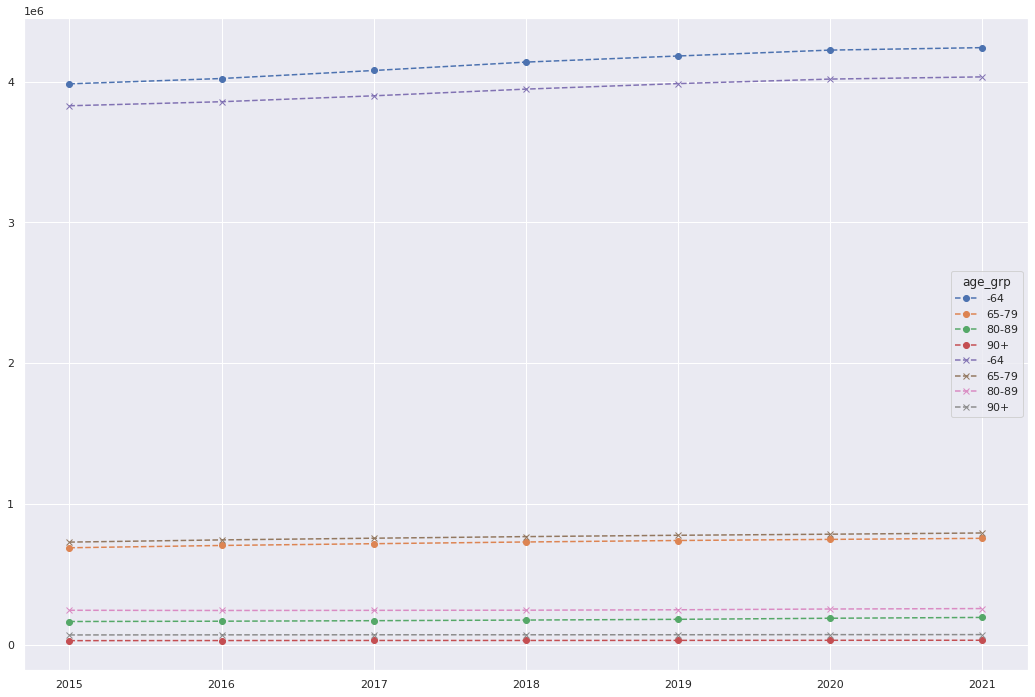

In [470]:
ax = binned_male_pop.plot(style='o--',figsize=(18,12))
binned_female_pop.plot(ax=ax,style='x--')

In [472]:
binned_female_pop / binned_male_pop

age_grp,-64,65-79,80-89,90+
2015,0.960931,1.058289,1.483709,2.390541
2016,0.959005,1.056042,1.455609,2.356372
2017,0.955923,1.054385,1.429142,2.331808
2018,0.953619,1.052265,1.399643,2.324746
2019,0.953116,1.050140,1.375876,2.291859
2020,0.951260,1.049282,1.348659,2.270210
2021,0.951032,1.050188,1.324693,2.257296


2015    4866363
2016    4923562
2017    4997278
2018    5073693
2019    5133164
2020    5191317
2021    5222532
dtype: int64
2015    4871196
2016    4914856
2017    4970359
2018    5030343
2019    5082145
2020    5128156
2021    5155951
dtype: int64


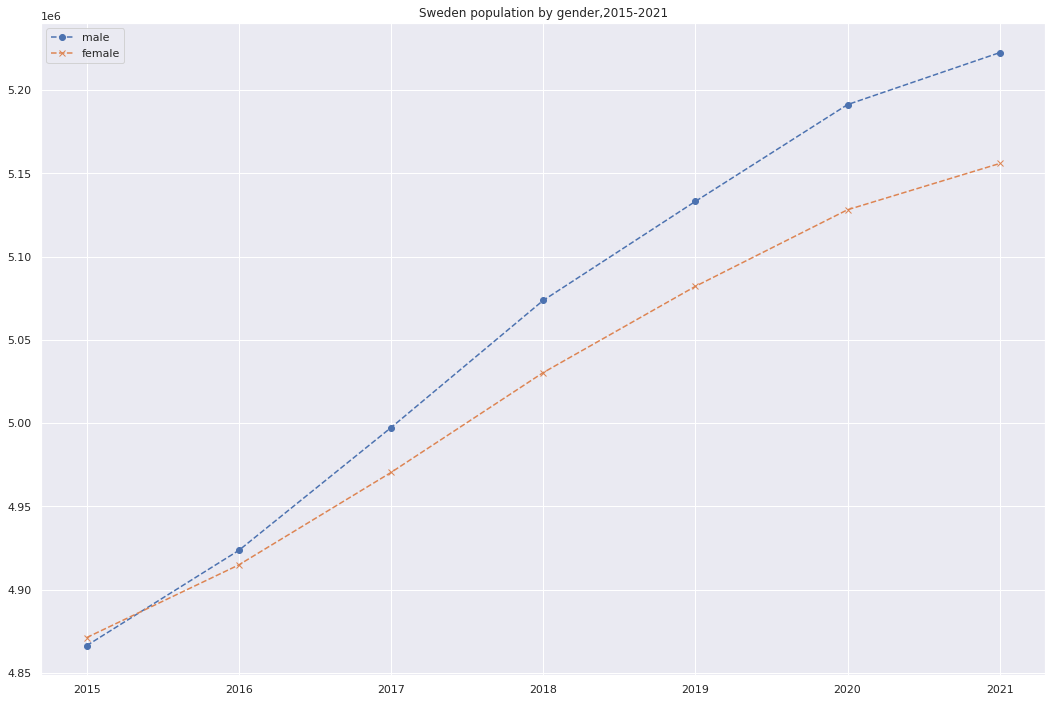

In [442]:
print (binned_male_pop.sum(axis=1))
print (binned_female_pop.sum(axis=1))

ax = binned_male_pop.sum(axis=1).plot(figsize=(18,12),style='o--',title='Sweden population by gender,2015-2021')
binned_female_pop.sum(axis=1).plot(ax=ax,style='x--')

ax.legend(['male','female'])
plt.savefig('scb_gender_population.jpg',format='jpg')

In [443]:
print (male_deaths.info())
print ()
print (binned_male_pop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2015 to 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -64     7 non-null      float64
 1   65-79   7 non-null      float64
 2   80-89   7 non-null      float64
 3   90+     7 non-null      float64
dtypes: float64(4)
memory usage: 280.0 bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 2015 to 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   -64     7 non-null      int64
 1   65-79   7 non-null      int64
 2   80-89   7 non-null      int64
 3   90+     7 non-null      int64
dtypes: int64(4)
memory usage: 356.0 bytes
None


In [444]:
male_mortality = male_deaths / binned_male_pop
male_mortality

,-64,65-79,80-89,90+
2015,0.001706,0.021729,0.093037,0.253125
2016,0.001663,0.021580,0.089650,0.252397
2017,0.001620,0.021005,0.089886,0.257060
2018,0.001581,0.021427,0.088972,0.250673
2019,0.001473,0.020682,0.083309,0.242425
2020,0.001554,0.022521,0.092406,0.271095
2021,0.000357,0.005613,0.021937,0.064942


In [445]:
female_mortality = female_deaths / binned_female_pop
female_mortality

,-64,65-79,80-89,90+
2015,0.001091,0.014737,0.068227,0.212591
2016,0.001085,0.014725,0.067569,0.212930
2017,0.001059,0.014889,0.068053,0.213113
2018,0.001029,0.014943,0.066029,0.212169
2019,0.000998,0.014106,0.062619,0.200501
2020,0.000969,0.015211,0.067713,0.218866
2021,0.000222,0.003599,0.016012,0.053365


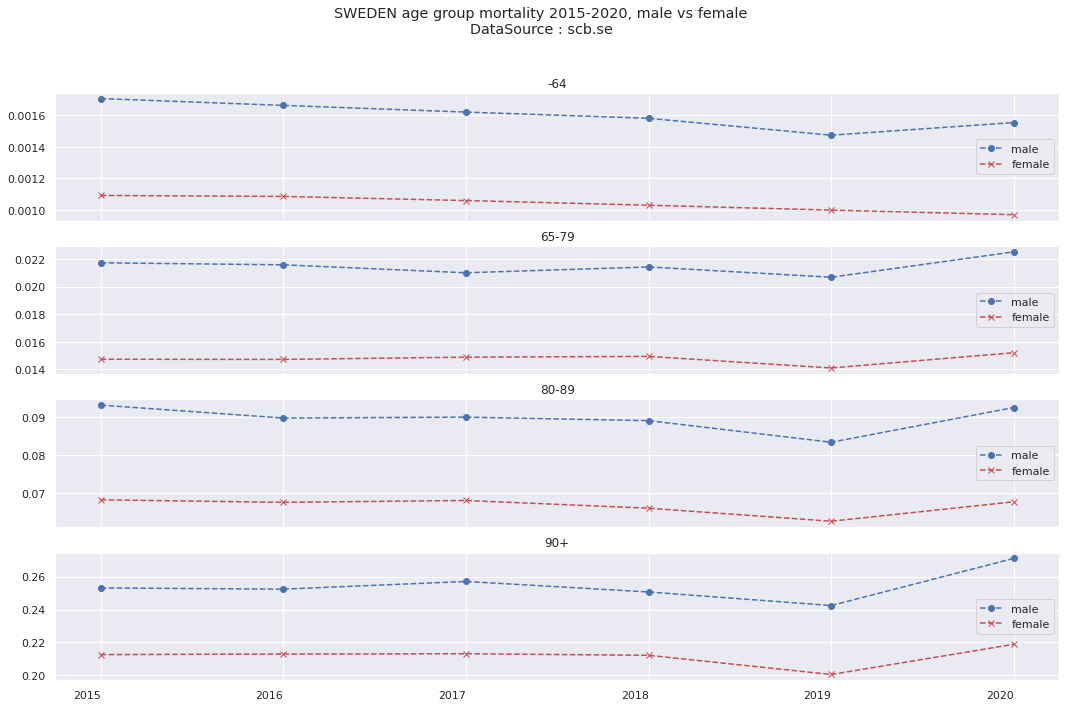

In [446]:
axes = male_mortality[:-1].plot(subplots=True,figsize=(18,12),style='bo--')
female_mortality[:-1].plot(subplots=True,ax=axes,style='rx--')

titles = ['-64','65-79','80-89','90+']

for i,a in enumerate(axes):
    a.legend(['male','female'])
    a.set_title(titles[i])
    
plt.suptitle('SWEDEN age group mortality 2015-2020, male vs female\nDataSource : scb.se')
plt.savefig('scb_gender_mortality.jpg',format='jpg')

,-64,65-79,80-89,90+
2015,1.563210,1.474433,1.363634,1.190666
2016,1.532482,1.465553,1.326805,1.185348
2017,1.530217,1.410775,1.320822,1.206214
2018,1.535982,1.433856,1.347465,1.181476
2019,1.476156,1.466193,1.330408,1.209096
2020,1.603433,1.480575,1.364669,1.238638
2021,1.611647,1.559659,1.370083,1.216956


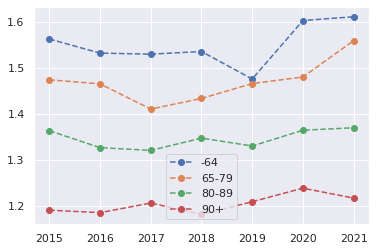

In [447]:
mort_rel = male_mortality / female_mortality
mort_rel.plot(style='o--')
mort_rel

In [460]:
print (mort_rel.agg(['min','max']))
mort_rel.agg(['argmin','argmax'])

          -64     65-79     80-89       90+
min  1.476156  1.410775  1.320822  1.181476
max  1.611647  1.559659  1.370083  1.238638


,-64,65-79,80-89,90+
argmin,4,2,2,3
argmax,6,6,6,5


,-64,65-79,80-89,90+
2015,0.000615,0.006992,0.024810,0.040534
2016,0.000578,0.006855,0.022082,0.039466
2017,0.000561,0.006116,0.021833,0.043947
2018,0.000552,0.006483,0.022943,0.038504
2019,0.000475,0.006576,0.020690,0.041924
2020,0.000585,0.007310,0.024693,0.052230
2021,0.000136,0.002014,0.005926,0.011578


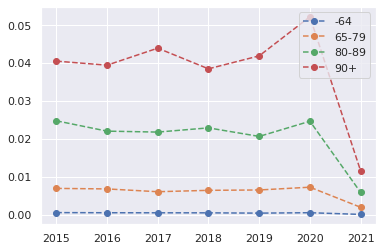

In [461]:
mort_diff = male_mortality - female_mortality
mort_diff.plot(style='o--')
mort_diff

In [449]:
def baseline(df,start_year='2015',end_year='2018'):
    base = df.loc[start_year:end_year].mean()
    return base

base_female_15_18 = baseline(female_mortality)
base_male_15_18 = baseline(male_mortality)

expected_female_15_18 = binned_female_pop * base_female_15_18
expected_male_15_18 = binned_male_pop * base_male_15_18

expected_female_15_18

age_grp,-64,65-79,80-89,90+
2015,4080.541452,10805.235436,16520.456109,14804.627177
2016,4111.173643,11038.455501,16418.914454,14952.879768
2017,4155.976486,11216.398274,16481.391246,15068.801809
2018,4206.639262,11384.957693,16555.472799,15066.674799
2019,4248.358099,11525.203993,16758.825986,15107.513390
2020,4282.614770,11638.871535,17123.228960,15279.163091
2021,4299.343879,11766.917993,17339.738707,15333.401844


,F -64,F 65-79,F 80-89,F 90+,M -64,M 65-79,M 80-89,M 90+
2015,4080.541452,10805.235436,16520.456109,14804.627177,6542.192708,14763.969521,14916.551491,7375.482549
2016,4111.173643,11038.455501,16418.914454,14952.879768,6604.544368,15114.735228,15111.062939,7557.361807
2017,4155.976486,11216.398274,16481.391246,15068.801809,6698.044760,15382.525253,15449.469473,7696.177730
2018,4206.639262,11384.957693,16555.472799,15066.674799,6796.073098,15645.149394,15845.994438,7718.469339
2019,4248.358099,11525.203993,16758.825986,15107.513390,6867.096345,15869.918961,16317.720854,7850.445792
2020,4282.614770,11638.871535,17123.228960,15279.163091,6935.977972,16039.535744,17008.995741,8015.353030
2021,4299.343879,11766.917993,17339.738707,15333.401844,6964.742017,16202.014603,17535.677064,8089.827266


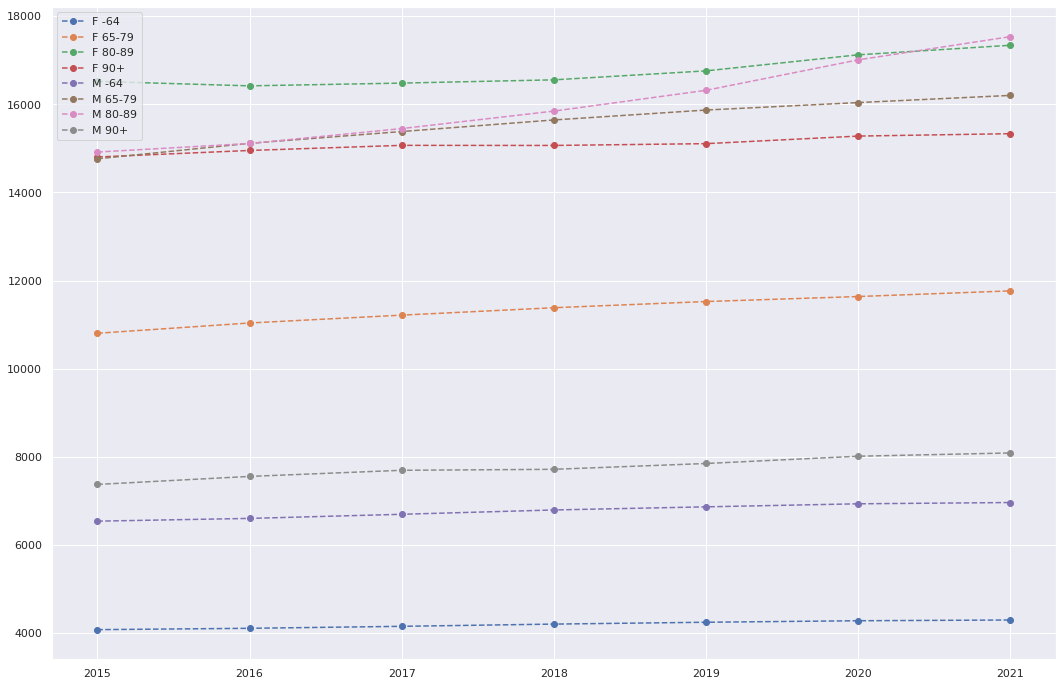

In [467]:
expected_15_18 = pd.concat([expected_female_15_18,expected_male_15_18],axis=1)
expected_15_18.columns = ['F -64','F 65-79', 'F 80-89','F 90+',
                        'M -64', 'M 65-79','M 80-89','M 90+']
expected_15_18.plot(figsize=(18,12),style='o--')
expected_15_18

In [450]:
female_excess_15_18 = female_deaths - expected_female_15_18
female_excess_15_18

,-64,65-79,80-89,90+
2015,96.458548,-63.235436,185.543891,-7.627177
2016,72.826357,-73.455501,24.085546,16.120232
2017,-27.976486,49.601726,142.608754,29.198191
2018,-145.639262,92.042307,-353.472799,-37.674799
2019,-270.358099,-558.203993,-1204.825986,-866.513390
2020,-389.614770,304.128465,61.771040,442.836909
2021,-3405.343879,-8909.917993,-13224.738707,-11486.401844


In [451]:
male_excess_15_18 = male_deaths - expected_male_15_18
male_excess_15_18

,-64,65-79,80-89,90+
2015,252.807292,202.030479,437.448509,-5.482549
2016,81.455632,102.264772,-123.062939,-27.361807
2017,-90.044760,-308.525253,-85.469473,113.822270
2018,-255.073098,-6.149394,-247.994438,-80.469339
2019,-706.096345,-557.918961,-1277.720854,-337.445792
2020,-373.977972,812.464256,380.004259,562.646970
2021,-5449.742017,-11959.014603,-13279.677064,-6015.827266


In [452]:
print (female_excess_15_18.sum(axis=1))
print (male_excess_15_18.sum(axis=1))
print (female_excess_15_18.sum(axis=1) + male_excess_15_18.sum(axis=1))

2015      211.139826
2016       39.576634
2017      193.432185
2018     -444.744553
2019    -2899.901467
2020      419.121644
2021   -37026.402423
dtype: float64
2015      886.803731
2016       33.295658
2017     -370.217216
2018     -589.686268
2019    -2879.181951
2020     1381.137514
2021   -36704.260951
dtype: float64
2015     1097.943557
2016       72.872293
2017     -176.785031
2018    -1034.430821
2019    -5779.083418
2020     1800.259158
2021   -73730.663374
dtype: float64


In [453]:
gender_excess = pd.concat([female_excess_15_18,male_excess_15_18],axis=1)
gender_excess.columns = ['F -64','F 65-79', 'F 80-89','F 90+',
                        'M -64', 'M 65-79','M 80-89','M 90+']
gender_excess

,F -64,F 65-79,F 80-89,F 90+,M -64,M 65-79,M 80-89,M 90+
2015,96.458548,-63.235436,185.543891,-7.627177,252.807292,202.030479,437.448509,-5.482549
2016,72.826357,-73.455501,24.085546,16.120232,81.455632,102.264772,-123.062939,-27.361807
2017,-27.976486,49.601726,142.608754,29.198191,-90.044760,-308.525253,-85.469473,113.822270
2018,-145.639262,92.042307,-353.472799,-37.674799,-255.073098,-6.149394,-247.994438,-80.469339
2019,-270.358099,-558.203993,-1204.825986,-866.513390,-706.096345,-557.918961,-1277.720854,-337.445792
2020,-389.614770,304.128465,61.771040,442.836909,-373.977972,812.464256,380.004259,562.646970
2021,-3405.343879,-8909.917993,-13224.738707,-11486.401844,-5449.742017,-11959.014603,-13279.677064,-6015.827266


In [454]:
def combine_gender(col):
    if '64' in col:
        return '-64'
    if '65' in col:
        return '65-79'
    if '80' in col:
        return '80-89'
    if '90+' in col:
        return '90+'
    

In [455]:
gender_excess.groupby(combine_gender,axis=1).sum().sum(axis=1)

2015     1097.943557
2016       72.872293
2017     -176.785031
2018    -1034.430821
2019    -5779.083418
2020     1800.259158
2021   -73730.663374
dtype: float64

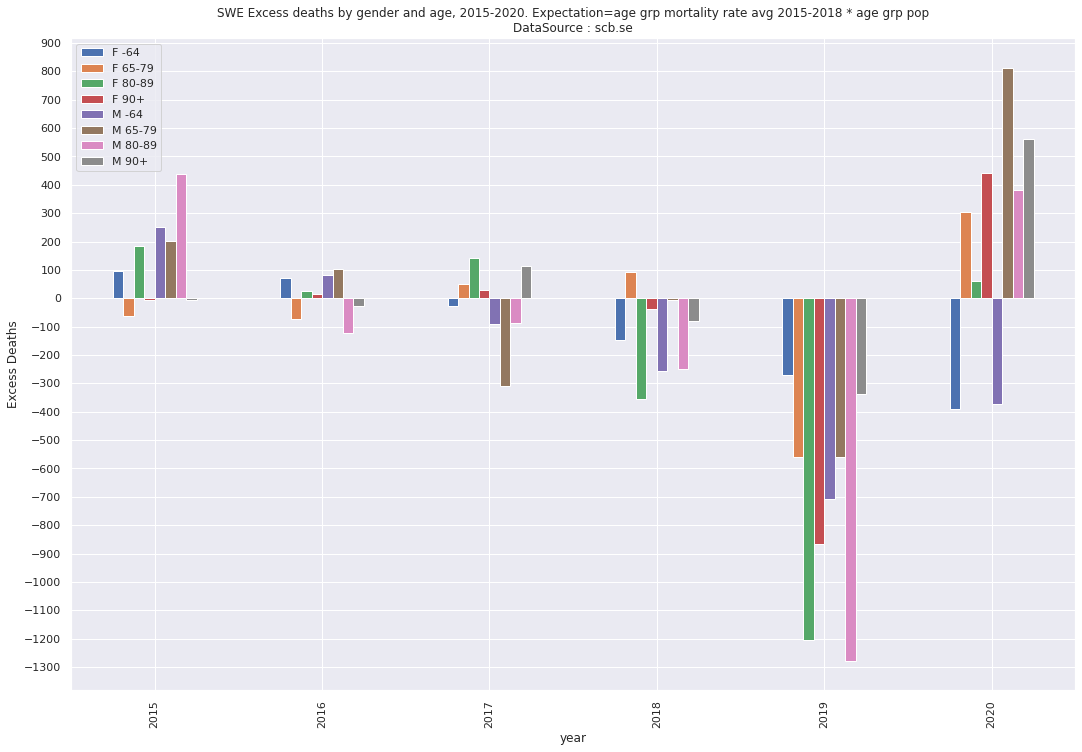

In [456]:
title = 'SWE Excess deaths by gender and age, 2015-2020. Expectation=age grp mortality rate avg 2015-2018 * age grp pop' +\
'\nDataSource : scb.se'
gender_excess[:-1].plot(kind='bar',figsize=(18,12),title=title)

plt.ylabel('Excess Deaths')
plt.xlabel('year')
_= plt.yticks(np.arange(-1300,1000,100))

plt.savefig('scb_gender_excess_deaths.jpg',format='jpg')


<AxesSubplot:>

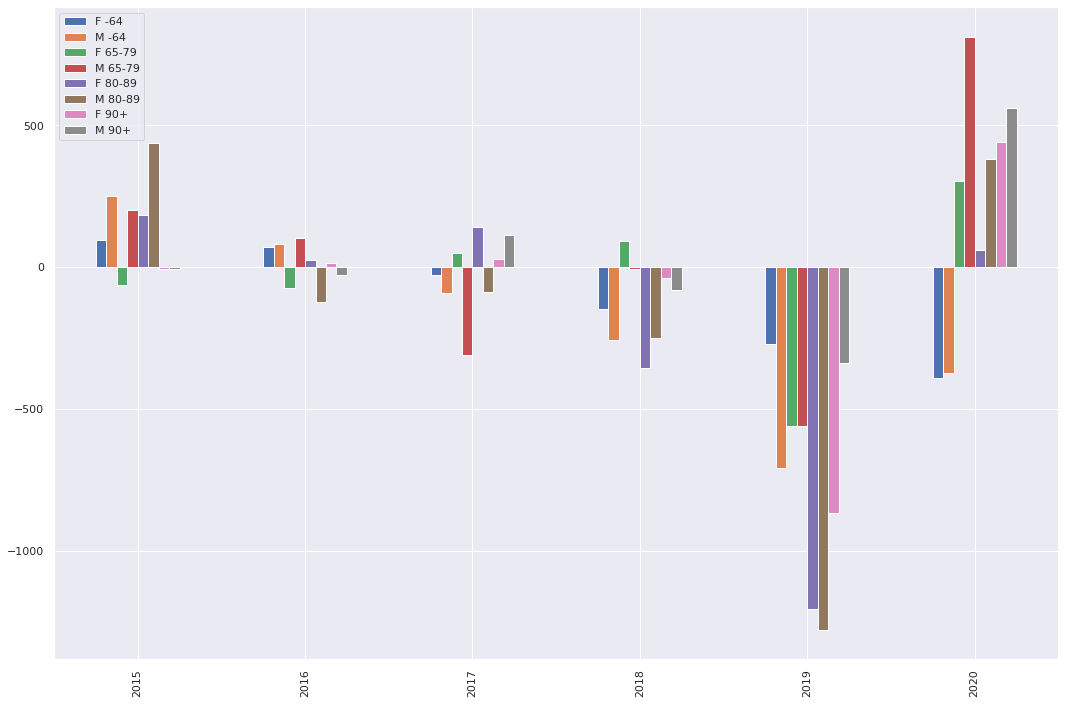

In [457]:
gender_excess[:-1].plot(y=['F -64','M -64','F 65-79','M 65-79','F 80-89','M 80-89',
                           'F 90+','M 90+'],kind='bar',figsize=(18,12))